In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-01-16 01:44:36--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 108.177.11.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2023-01-16 01:44:36 (92.1 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [3]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [5]:
import tensorflow as tf

embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
__________________________________________________

In [6]:
NUM_EPOCHS = 10

history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 18s 28ms/step - loss: 0.4539 - accuracy: 0.7707 - val_loss: 0.3593 - val_accuracy: 0.8432
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2374 - accuracy: 0.9062 - val_loss: 0.3594 - val_accuracy: 0.8463
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1327 - accuracy: 0.9528 - val_loss: 0.4407 - val_accuracy: 0.8423
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0640 - accuracy: 0.9793 - val_loss: 0.5842 - val_accuracy: 0.8344
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0255 - accuracy: 0.9933 - val_loss: 0.6587 - val_accuracy: 0.8351
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.7830 - val_accuracy: 0.8357
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.8506 - val_accuracy:

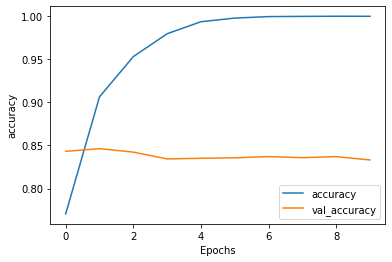

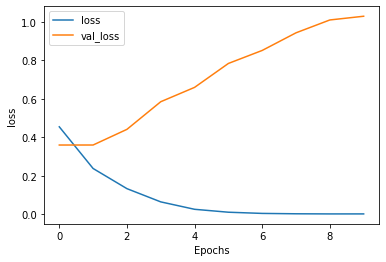

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')